Lisa Ho Yen Xin 20297507

# [1] Import Functions

## [1.1] Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%run /content/drive/MyDrive/FYP/ImportFunctions.ipynb

## [1.2] Jupyter

In [ ]:
%run ImportFunctions.ipynb

# [2] Import Libraries

In [3]:
import cv2
import numpy as np
import seaborn as sns
from keras.utils import plot_model
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_recall_fscore_support,
)
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import tensorflow as tf

# [3] Load Dataset

## [3.1] Google Colab

In [4]:
# Load images and labels
augmented_images = np.load('/content/drive/My Drive/FYP/dataset/augmented_images.npy')
augmented_labels = np.load('/content/drive/My Drive/FYP/dataset/augmented_labels.npy')

## [3.2] Jupyter

In [ ]:
# Load images and labels
augmented_images = np.load('dataset/augmented_images.npy')
augmented_labels = np.load('dataset/augmented_labels.npy')

# [4] Prepare Dataset

In [5]:
augmented_images = resize_images(augmented_images, (299,299))

In [6]:
# Display array shapes
display_array_shapes(augmented_images, augmented_labels)

+--------------+---------------------+
| Array Name   | Shape               |
+==============+=====================+
| Images       | (1211, 299, 299, 3) |
+--------------+---------------------+
| Labels       | (1211,)             |
+--------------+---------------------+


In [7]:
# Get the number of unique labels
num_classes = len(np.unique(augmented_labels))

print("Number of unique labels:", num_classes)

Number of unique labels: 9


In [8]:
# Binarize labels
augmented_labels_binarized = binarize_labels(augmented_labels)

# [5] Train Model

In [9]:
# Split the data into training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(augmented_images, augmented_labels_binarized, test_size=0.2, random_state=42)

# Further split the temporary data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (968, 299, 299, 3) (968, 9)
Validation shape: (121, 299, 299, 3) (121, 9)
Test shape: (122, 299, 299, 3) (122, 9)


In [10]:
# Build and compile InceptionV3 model
inceptionv3_model = build_and_compile_inceptionv3_model(num_classes)

87910968/87910968 [==============================] - 1s 0us/step


In [11]:
# Train the model
inceptionv3_history = inceptionv3_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=30)

# Evaluate the model on the validation data
inceptionv3_loss, inceptionv3_accuracy = inceptionv3_model.evaluate(X_val, y_val)

Epoch 1/30
24/24 [==============================] - 305s 12s/step - loss: 12.4672 - accuracy: 0.4432 - val_loss: 9.0069 - val_accuracy: 0.5124
Epoch 2/30
24/24 [==============================] - 271s 11s/step - loss: 2.4213 - accuracy: 0.8275 - val_loss: 4.5559 - val_accuracy: 0.7273
Epoch 3/30
24/24 [==============================] - 268s 11s/step - loss: 1.2007 - accuracy: 0.9070 - val_loss: 6.0026 - val_accuracy: 0.7355
Epoch 4/30
24/24 [==============================] - 284s 12s/step - loss: 0.2431 - accuracy: 0.9680 - val_loss: 4.6049 - val_accuracy: 0.7603
Epoch 5/30
24/24 [==============================] - 271s 11s/step - loss: 0.1547 - accuracy: 0.9793 - val_loss: 4.7561 - val_accuracy: 0.7603
Epoch 6/30
24/24 [==============================] - 283s 12s/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 4.3921 - val_accuracy: 0.7603
Epoch 7/30
24/24 [==============================] - 279s 12s/step - loss: 0.0112 - accuracy: 0.9990 - val_loss: 4.4353 - val_accuracy: 0.7769
Epoch

In [12]:
# Calculate average loss and accuracy
average_loss = sum(inceptionv3_history.history['val_loss']) / len(inceptionv3_history.history['val_loss'])
average_accuracy = sum(inceptionv3_history.history['val_accuracy']) / len(inceptionv3_history.history['val_accuracy'])

print(f"Average Validation Loss: {average_loss}, Average Validation Accuracy: {average_accuracy}")

Average Validation Loss: 4.751496013005575, Average Validation Accuracy: 0.7716253399848938


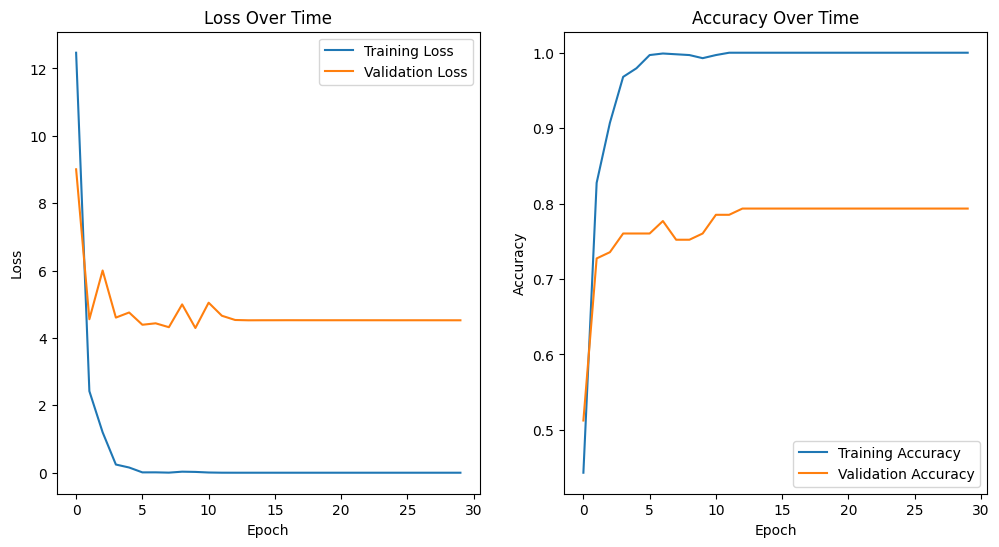

In [13]:
plot_training_history(inceptionv3_history)

# [6] Save Model

## [6.1] Google Colab

In [14]:
# Save model
inceptionv3_model.save('/content/drive/MyDrive/FYP/models/InceptionV3_augment_30epochs')

## [6.2] Jupyter

In [ ]:
# Save model
inceptionv3_model.save('models/InceptionV3_augment_30epochs')

INFO:tensorflow:Assets written to: models/InceptionV3_9labels/assets


INFO:tensorflow:Assets written to: models/InceptionV3_9labels/assets


# [6] Load Model

## [6.1] Google Colab

In [15]:
# Load the saved model
loaded_inceptionv3_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/InceptionV3_augment_30epochs')

## [6.2] Jupyter

In [ ]:
# Load the saved model
loaded_inceptionv3_model = tf.keras.models.load_model('models/InceptionV3_augment_30epochs')

# [7] Test and Analyse

In [16]:
# Evaluate the model on the test data
inceptionv3_test_loss, inceptionv3_test_accuracy = loaded_inceptionv3_model.evaluate(X_test, y_test)
print(f"Test Loss: {inceptionv3_test_loss}, Test Accuracy: {inceptionv3_test_accuracy}")

4/4 [==============================] - 38s 8s/step - loss: 3.6645 - accuracy: 0.7377
Test Loss: 3.6644511222839355, Test Accuracy: 0.7377049326896667


In [17]:
inceptionv3_predicted_labels, inceptionv3_true_labels_list = make_predictions_and_evaluate(loaded_inceptionv3_model, X_test, y_test)

4/4 [==============================] - 33s 8s/step


In [18]:
calculate_classification_metrics(inceptionv3_true_labels_list, inceptionv3_predicted_labels)

Accuracy: 0.7377
Precision: 0.7479
Recall: 0.7377
F1 Score: 0.7350


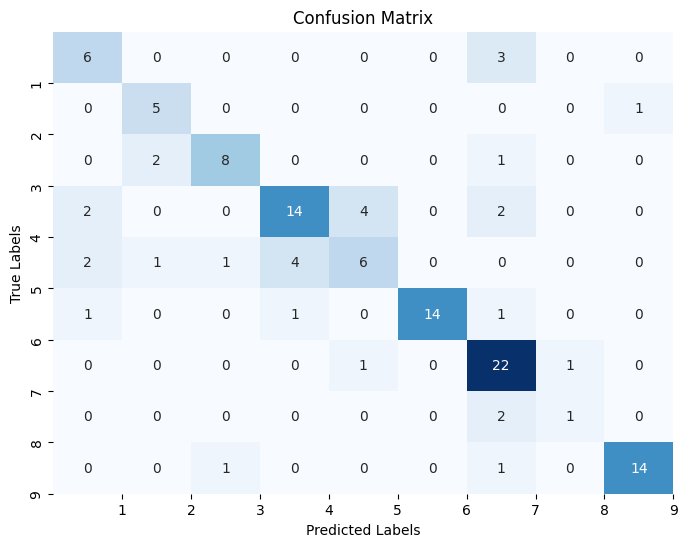

In [19]:
display_confusion_matrix(inceptionv3_true_labels_list, inceptionv3_predicted_labels)